In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head(5)

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,0,221900,3,1,1180,1,0,0,7,1180,0,0,1340
1,1,538000,3,2,2570,2,0,0,7,2170,400,1991,1690
2,2,180000,2,1,770,1,0,0,6,770,0,0,2720
3,3,604000,4,3,1960,1,0,0,7,1050,910,0,1360
4,4,510000,3,2,1680,1,0,0,8,1680,0,0,1800


In [4]:
data=data.drop(["Unnamed: 0"],axis=1)

In [5]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,221900,3,1,1180,1,0,0,7,1180,0,0,1340
1,538000,3,2,2570,2,0,0,7,2170,400,1991,1690
2,180000,2,1,770,1,0,0,6,770,0,0,2720
3,604000,4,3,1960,1,0,0,7,1050,910,0,1360
4,510000,3,2,1680,1,0,0,8,1680,0,0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,3,0,0,8,1530,0,0,1530
21609,400000,4,2,2310,2,0,0,8,2310,0,0,1830
21610,402101,2,0,1020,2,0,0,7,1020,0,0,1020
21611,400000,3,2,1600,2,0,0,8,1600,0,0,1410


In [6]:
X = data.drop('price',axis =1).values
y = data['price'].values

In [7]:
X.shape

(21613, 11)

In [8]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [9]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [10]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


In [11]:
# having 11 neuron is based on the number of available features
model = Sequential()
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [12]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
114/114 [==============================] - 1s 4ms/step - loss: 425278111744.0000 - val_loss: 428874104832.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 425168502784.0000 - val_loss: 428494159872.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 423334772736.0000 - val_loss: 423570145280.0000
Epoch 4/400
114/114 [==============================] - 0s 2ms/step - loss: 410187825152.0000 - val_loss: 396618629120.0000
Epoch 5/400
114/114 [==============================] - 0s 2ms/step - loss: 360840101888.0000 - val_loss: 317296082944.0000
Epoch 6/400
114/114 [==============================] - 0s 2ms/step - loss: 262195412992.0000 - val_loss: 191701794816.0000
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 156108996608.0000 - val_loss: 106529087488.0000
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 115763658752.0000 - val_loss: 82319392768.0000
Epoch 9/400
114/1

114/114 [==============================] - 0s 4ms/step - loss: 75742625792.0000 - val_loss: 48584593408.0000
Epoch 69/400
114/114 [==============================] - 0s 4ms/step - loss: 75777597440.0000 - val_loss: 48031023104.0000
Epoch 70/400
114/114 [==============================] - 0s 2ms/step - loss: 78830788608.0000 - val_loss: 49438265344.0000
Epoch 71/400
114/114 [==============================] - 0s 3ms/step - loss: 75222392832.0000 - val_loss: 48688893952.0000
Epoch 72/400
114/114 [==============================] - 0s 4ms/step - loss: 76394995712.0000 - val_loss: 48998551552.0000
Epoch 73/400
114/114 [==============================] - 0s 3ms/step - loss: 74922508288.0000 - val_loss: 48386707456.0000
Epoch 74/400
114/114 [==============================] - 0s 3ms/step - loss: 78478532608.0000 - val_loss: 48462696448.0000
Epoch 75/400
114/114 [==============================] - 0s 3ms/step - loss: 74232455168.0000 - val_loss: 48143998976.0000
Epoch 76/400
114/114 [===============

Epoch 135/400
114/114 [==============================] - 0s 4ms/step - loss: 73244737536.0000 - val_loss: 47851565056.0000
Epoch 136/400
114/114 [==============================] - 0s 4ms/step - loss: 74192822272.0000 - val_loss: 47916843008.0000
Epoch 137/400
114/114 [==============================] - 0s 4ms/step - loss: 74122739712.0000 - val_loss: 47439241216.0000
Epoch 138/400
114/114 [==============================] - 0s 4ms/step - loss: 73336012800.0000 - val_loss: 47663996928.0000
Epoch 139/400
114/114 [==============================] - 0s 4ms/step - loss: 73938935808.0000 - val_loss: 47674347520.0000
Epoch 140/400
114/114 [==============================] - 0s 4ms/step - loss: 73641312256.0000 - val_loss: 47397994496.0000
Epoch 141/400
114/114 [==============================] - 0s 4ms/step - loss: 73364021248.0000 - val_loss: 47791796224.0000
Epoch 142/400
114/114 [==============================] - 0s 4ms/step - loss: 74369957888.0000 - val_loss: 47545634816.0000
Epoch 143/400
11

114/114 [==============================] - 0s 4ms/step - loss: 72645902336.0000 - val_loss: 47035166720.0000
Epoch 202/400
114/114 [==============================] - 0s 4ms/step - loss: 73138364416.0000 - val_loss: 46219485184.0000
Epoch 203/400
114/114 [==============================] - 0s 4ms/step - loss: 72072863744.0000 - val_loss: 46578941952.0000
Epoch 204/400
114/114 [==============================] - 0s 4ms/step - loss: 71017627648.0000 - val_loss: 46700138496.0000
Epoch 205/400
114/114 [==============================] - 0s 4ms/step - loss: 71411810304.0000 - val_loss: 47397044224.0000
Epoch 206/400
114/114 [==============================] - 0s 4ms/step - loss: 72999452672.0000 - val_loss: 47272419328.0000
Epoch 207/400
114/114 [==============================] - 0s 3ms/step - loss: 69925117952.0000 - val_loss: 46691786752.0000
Epoch 208/400
114/114 [==============================] - 0s 3ms/step - loss: 70252978176.0000 - val_loss: 47024275456.0000
Epoch 209/400
114/114 [=======

114/114 [==============================] - 0s 4ms/step - loss: 70215745536.0000 - val_loss: 45613621248.0000
Epoch 268/400
114/114 [==============================] - 1s 5ms/step - loss: 69630435328.0000 - val_loss: 46550646784.0000
Epoch 269/400
114/114 [==============================] - 0s 4ms/step - loss: 71615184896.0000 - val_loss: 45829042176.0000
Epoch 270/400
114/114 [==============================] - 0s 4ms/step - loss: 69232222208.0000 - val_loss: 45740105728.0000
Epoch 271/400
114/114 [==============================] - 0s 4ms/step - loss: 69094875136.0000 - val_loss: 45912162304.0000
Epoch 272/400
114/114 [==============================] - 0s 4ms/step - loss: 70656557056.0000 - val_loss: 46410125312.0000
Epoch 273/400
114/114 [==============================] - 0s 3ms/step - loss: 69768003584.0000 - val_loss: 45735821312.0000
Epoch 274/400
114/114 [==============================] - 0s 3ms/step - loss: 70777110528.0000 - val_loss: 45891919872.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 4ms/step - loss: 68748853248.0000 - val_loss: 45424930816.0000
Epoch 334/400
114/114 [==============================] - 0s 4ms/step - loss: 68414476288.0000 - val_loss: 45288734720.0000
Epoch 335/400
114/114 [==============================] - 0s 4ms/step - loss: 67875074048.0000 - val_loss: 45427658752.0000
Epoch 336/400
114/114 [==============================] - 0s 4ms/step - loss: 67105677312.0000 - val_loss: 45212336128.0000
Epoch 337/400
114/114 [==============================] - 0s 4ms/step - loss: 68686430208.0000 - val_loss: 46038650880.0000
Epoch 338/400
114/114 [==============================] - 0s 4ms/step - loss: 67437797376.0000 - val_loss: 45399457792.0000
Epoch 339/400
114/114 [==============================] - 1s 4ms/step - loss: 67666526208.0000 - val_loss: 45460078592.0000
Epoch 340/400
114/114 [==============================] - 0s 4ms/step - loss: 68183568384.0000 - val_loss: 45593251840.0000
Epoch 341/400
114/114 [=======

114/114 [==============================] - 0s 4ms/step - loss: 65250615296.0000 - val_loss: 44430041088.0000
Epoch 400/400
114/114 [==============================] - 0s 3ms/step - loss: 65755611136.0000 - val_loss: 44866924544.0000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dropout (Dropout)            (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
______________________

<AxesSubplot:>

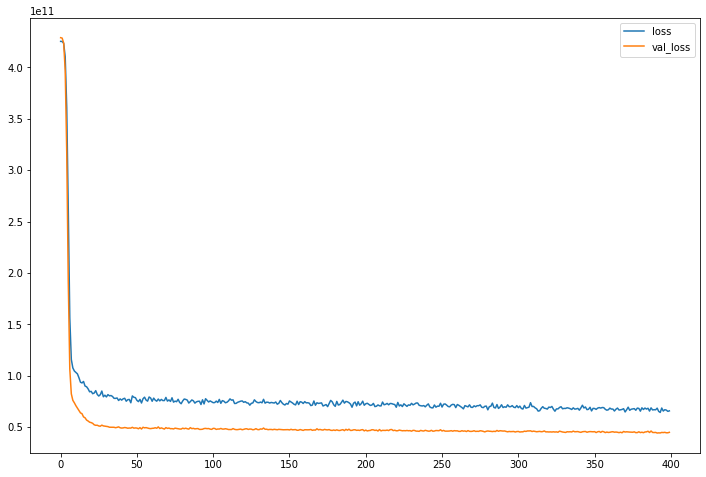

In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 139929.17863714427
MSE: 44866910679.645195
RMSE: 211818.1075348498
VarScore: 0.6785291116849661


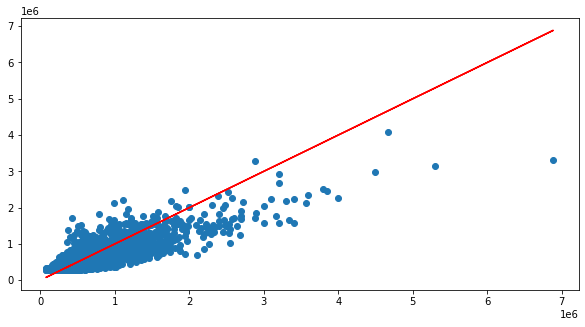

In [14]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [15]:
# model predicted 67%